Training SVM with C=1, gamma=0.1, kernel=poly...


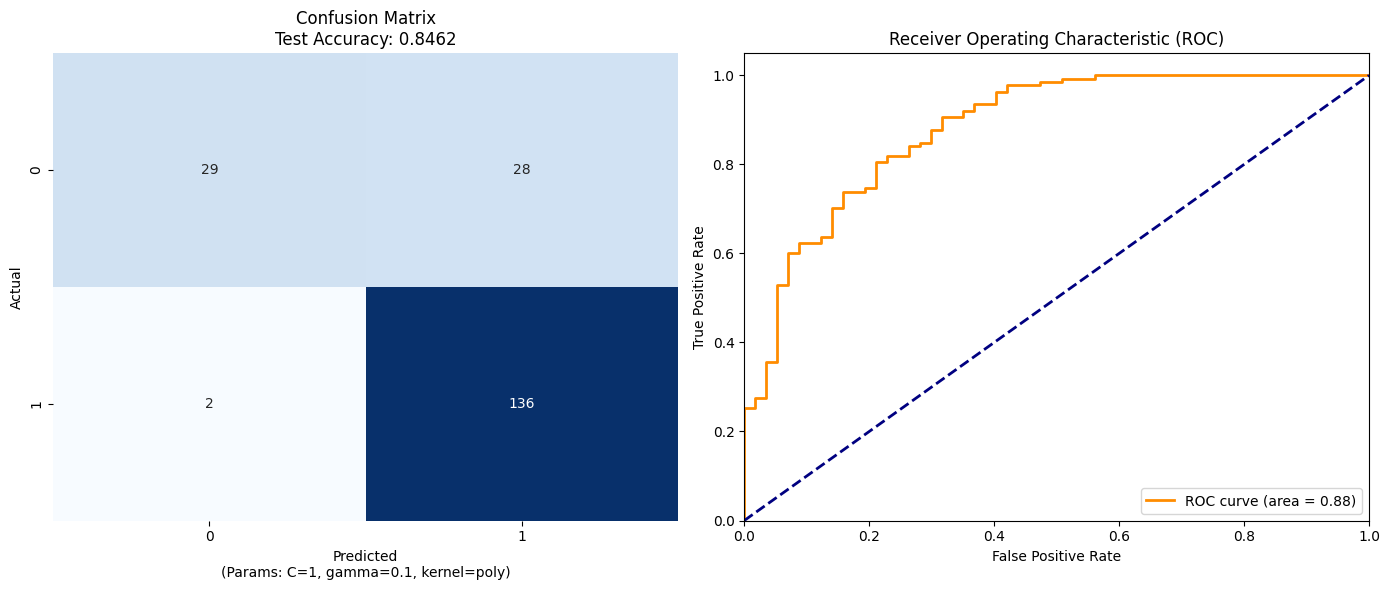

------------------------------
Final Results for C=1, gamma=0.1, kernel=poly:
Test Accuracy: 0.8462
ROC AUC: 0.8822
------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# =========================================
# ส่วนที่ 1: เตรียมข้อมูล
file_path = 'updated_cleaned_patient_data.csv'
df = pd.read_csv(file_path)


# =========================================
# สมมติว่าคุณมี DataFrame ชื่อ df
# df = pd.read_csv('your_data.csv') # โหลดข้อมูลจริงของคุณตรงนี้

# --- 1.1 จัดการค่าว่าง: เติม 0 ตามที่ต้องการ ---
df = df.dropna()

# --- 1.2 แยก Features (X) และ Target (y) ---
# ปรับแก้บรรทัดนี้ให้ตรงกับโครงสร้างข้อมูลจริงของคุณ
# สมมติว่า Target อยู่คอลัมน์สุดท้าย
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# --- 1.3 แบ่ง Train/Test ---
# ใช้ stratify=y เพื่อรักษา create สัดส่วนของคลาสใน train/test ให้สมดุล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 1.4 Scaling (สำคัญมากสำหรับ SVM) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # ใช้ transform กับ test set เท่านั้น

# =========================================
# ส่วนที่ 2: กำหนดพารามิเตอร์และสร้างโมเดล
# =========================================

# ----- ใส่พารามิเตอร์ที่คุณต้องการทดสอบตรงนี้ครับ -----
my_C = 1           # <--- แก้ไขค่า C ตรงนี้ (เช่น 0.1, 1, 100)
my_gamma = 0.1  # <--- แก้ไขค่า gamma ตรงนี้ (เช่น 0.1, 0.01 หรือ 'scale')
my_kernel = 'poly'   # <--- แก้ไข kernel ตรงนี้ (เช่น 'linear', 'poly')
# ------------------------------------------------

print(f"Training SVM with C={my_C}, gamma={my_gamma}, kernel={my_kernel}...")

# สร้างโมเดลด้วยพารามิเตอร์ที่กำหนด
# ต้องใส่ probability=True เพื่อให้วาด ROC Curve ได้
svm_model = SVC(C=my_C,
                gamma=my_gamma,
                kernel=my_kernel,
                probability=True,
                random_state=42)

# เทรนโมเดล
svm_model.fit(X_train_scaled, y_train)

# =========================================
# ส่วนที่ 3: การวัดผลและพล็อตกราฟ
# =========================================

# ทำนายผล (Class 0 หรือ 1)
y_pred = svm_model.predict(X_test_scaled)
# ทำนายความน่าจะเป็น (สำหรับ ROC Curve)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# คำนวณ Accuracy
test_acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(14, 6))

# --- Visual 1: Confusion Matrix ---
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# แสดง Accuracy และ พารามิเตอร์ที่ใช้ในกราฟ
plt.title(f'Confusion Matrix\nTest Accuracy: {test_acc:.4f}')
plt.xlabel(f'Predicted\n(Params: C={my_C}, gamma={my_gamma}, kernel={my_kernel})')
plt.ylabel('Actual')

# --- Visual 2: ROC Curve ---
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

print("-" * 30)
print(f"Final Results for C={my_C}, gamma={my_gamma}, kernel={my_kernel}:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("-" * 30)

In [2]:
from sklearn.metrics import classification_report
import pandas as pd

# 1. สร้าง Report ในรูปแบบ Dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# 2. แปลง Dictionary ให้เป็น DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# 3. ปรับการแสดงผลเลขทศนิยมให้สวยงาม (เช่น 2 ตำแหน่งตามรูป)
report_df = report_df.round(2)

# แสดงผลตาราง
print("Classification Report Table:")
display(report_df) # ถ้าใช้ Jupyter Notebook / Google Colab
# print(report_df)  # ถ้าใช้ IDE ปกติ

Classification Report Table:


,precision,recall,f1-score,support
0,0.94,0.51,0.66,57.00
1,0.83,0.99,0.90,138.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.88,0.75,0.78,195.00
weighted avg,0.86,0.85,0.83,195.00
